Compute the filtering scale to filter the input features.

Filtering scale uses DINO at 025 resolution, and needs to be regridded to DINO at 16 resolution.

In [1]:
import xesmf as xe
import xarray as xr
import numpy as np

Open datasets

In [2]:
mask025_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/mesh_mask_exp4_SO_JET.nc'
mask025 = xr.open_dataset(mask025_path)

mask025

In [3]:
mask16_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/mesh_mask_exp16_SO_JET.nc'
mask16 = xr.open_dataset(mask16_path)
mask16

<xarray.Dataset> Size: 231MB
Dimensions:       (y: 216, x: 238, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 144B 5.034 15.32 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 4B 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x) float32 206kB ...
    nav_lat       (y, x) float32 206kB ...
    tmask         (time_counter, nav_lev, y, x) float32 7MB ...
    umask         (time_counter, nav_lev, y, x) float32 7MB ...
    vmask         (time_counter, nav_lev, y, x) float32 7MB ...
    fmask         (time_counter, nav_lev, y, x) float32 7MB ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 15MB ...
    e3vw_0        (time_counter, nav_lev, y, x) float64 15MB ...
    gdept_1d      (time_counter, nav_lev, y, x) float64 15MB ...
    gdepw_1d      (time_counter, nav_lev, y, x) float64 15MB ...
    gdept_0       (time_counter, nav_lev, y, x) float64 15MB ...
    gdepw_0       (time_counter, nav_lev, y, x) float64 15MB ...
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

Get input grid

Use mask025 from subset_dino.ipynb to get input grid

In [4]:
mask025 = mask025.rename({'x': 'lon', 'y': 'lat'})
mask025

<xarray.Dataset> Size: 15MB
Dimensions:       (lat: 54, lon: 60, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 144B 5.034 15.32 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 4B 0.0
Dimensions without coordinates: lat, lon
Data variables: (12/42)
    nav_lon       (lat, lon) float32 13kB ...
    nav_lat       (lat, lon) float32 13kB ...
    tmask         (time_counter, nav_lev, lat, lon) float32 467kB ...
    umask         (time_counter, nav_lev, lat, lon) float32 467kB ...
    vmask         (time_counter, nav_lev, lat, lon) float32 467kB ...
    fmask         (time_counter, nav_lev, lat, lon) float32 467kB ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, lat, lon) float64 933kB ...
    e3vw_0        (time_counter, nav_lev, lat, lon) float64 933kB ...
    gdept_1d      (time_counter, nav_lev, lat, lon) float64 933kB ...
    gdepw_1d      (time_counter, nav_lev, lat, lon) float64 933kB ...
    gdept_0       (time_counter, nav_lev, lat, lon) float64 933kB ...
    gdepw_0       (time_counter, nav_lev, lat, lon) float64 933kB ...
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [5]:
input_grid = {'lon': mask025.glamt.isel(time_counter=0).values,
               'lat': mask025.gphit.isel(time_counter=0).values,
              }
input_grid

{'lon': array([[ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        ...,
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375]],
       shape=(54, 60)),
 'lat': array([[-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.25272135, -47.25272135, -47.25272135, ..., -47.25272135,
         -47.25272135, -47.25272135],
        [-47.08275797, -47.08275797, -47.08275797, ..., -47.08275797,
         -47.08275797, -47.08275797],
        ...,
        [-38.08845437, -38.08845437, -38.08845437, ..., -38.08845437,
         -38.08845437, -38.08845437],
        [-37.89142487, -37.89142487, -37.89142487, ..., -37.89142487,
         -37.89142487, -37.89142487],
        [-37.6938

Get output grid

In [6]:
mask16 = mask16.rename({'x': 'lon', 'y': 'lat'})
mask16

<xarray.Dataset> Size: 231MB
Dimensions:       (lat: 216, lon: 238, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 144B 5.034 15.32 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 4B 0.0
Dimensions without coordinates: lat, lon
Data variables: (12/42)
    nav_lon       (lat, lon) float32 206kB ...
    nav_lat       (lat, lon) float32 206kB ...
    tmask         (time_counter, nav_lev, lat, lon) float32 7MB ...
    umask         (time_counter, nav_lev, lat, lon) float32 7MB ...
    vmask         (time_counter, nav_lev, lat, lon) float32 7MB ...
    fmask         (time_counter, nav_lev, lat, lon) float32 7MB ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, lat, lon) float64 15MB ...
    e3vw_0        (time_counter, nav_lev, lat, lon) float64 15MB ...
    gdept_1d      (time_counter, nav_lev, lat, lon) float64 15MB ...
    gdepw_1d      (time_counter, nav_lev, lat, lon) float64 15MB ...
    gdept_0       (time_counter, nav_lev, lat, lon) float64 15MB ...
    gdepw_0       (time_counter, nav_lev, lat, lon) float64 15MB ...
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

In [7]:
target_grid = {'lon': mask16.glamt.isel(time_counter=0).values,
               'lat': mask16.gphit.isel(time_counter=0).values,
              }
target_grid

{'lon': array([[ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        ...,
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375]],
       shape=(216, 238)),
 'lat': array([[-47.46441098, -47.46441098, -47.46441098, ..., -47.46441098,
         -47.46441098, -47.46441098],
        [-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.37983704, -47.37983704, -47.37983704, ..., -47.37983704,
         -47.37983704, -47.37983704],
        ...,
        [-37.69386667, -37.69386667, -37.69386667, ..., -37.69386667,
         -37.69386667, -37.69386667],
        [-37.64439462, -37.64439462, -37.64439462, 

Get regridder weights

In [8]:
regridder = xe.Regridder(input_grid, target_grid, "bilinear")

In [9]:
regridder.to_netcdf('/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/bilinear_dino_025_to_16.nc')

'/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/bilinear_dino_025_to_16.nc'

Now compute kappa and regrid

In [16]:
grid_scale = np.sqrt(mask025.e1t*mask025.e2t)
max_grid_scale = grid_scale.max()
max_grid_scale

<xarray.DataArray ()> Size: 8B
array(21997.62096918)

Max grid scale from subset_dino.ipynb - NO! because gcm_filters needs kappa=1 at least somewhere in the domain

In [11]:
max_grid_scale = 27799.00

In [17]:
kappa = grid_scale.isel(time_counter=0) / max_grid_scale
kappa = kappa.to_dataset(name='kappa')
kappa

<xarray.Dataset> Size: 26kB
Dimensions:       (lat: 54, lon: 60)
Coordinates:
    time_counter  float32 4B 0.0
Dimensions without coordinates: lat, lon
Data variables:
    kappa         (lat, lon) float64 26kB 0.855 0.855 0.855 ... 1.0 1.0 1.0

In [49]:
kappa16 = regridder(kappa)

/opt/jaspy/lib/python3.12/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable kappa as the horizontal dimensions for the regridding.
  warnings.warn(


In [37]:
kappa16.kappa.isel(x=2).values

array([0.        , 0.85505025, 0.8557364 , 0.85642311, 0.85711036,
       0.85779817, 0.85848465, 0.85917167, 0.85985925, 0.86054737,
       0.86123415, 0.86192147, 0.86260935, 0.86329777, 0.86398482,
       0.86467242, 0.86536056, 0.86604926, 0.86673656, 0.86742441,
       0.86811281, 0.86880175, 0.86948928, 0.87017736, 0.87086598,
       0.87155514, 0.87224288, 0.87293116, 0.87361998, 0.87430935,
       0.87499727, 0.87568573, 0.87637473, 0.87706427, 0.87775234,
       0.87844095, 0.8791301 , 0.8798198 , 0.880508  , 0.88119674,
       0.88188602, 0.88257584, 0.88326415, 0.88395299, 0.88464238,
       0.88533229, 0.88602068, 0.88670961, 0.88739907, 0.88808906,
       0.8887775 , 0.88946648, 0.89015599, 0.89084603, 0.89153451,
       0.89222351, 0.89291305, 0.89360311, 0.89429159, 0.89498059,
       0.89567013, 0.89636019, 0.89704864, 0.89773762, 0.89842713,
       0.89911717, 0.89980557, 0.9004945 , 0.90118395, 0.90187393,
       0.90256225, 0.9032511 , 0.90394048, 0.90463037, 0.90531

Just setting boundaries to nearest value and setting some to 1.0 for gcm_filters compatability

In [50]:
kappa16.kappa[212:,2:] = 1.0

In [51]:
kappa16.kappa[:,0:2] = kappa16.kappa[:,3]

In [55]:
kappa16.kappa[0:2,:] = kappa16.kappa[3,:]

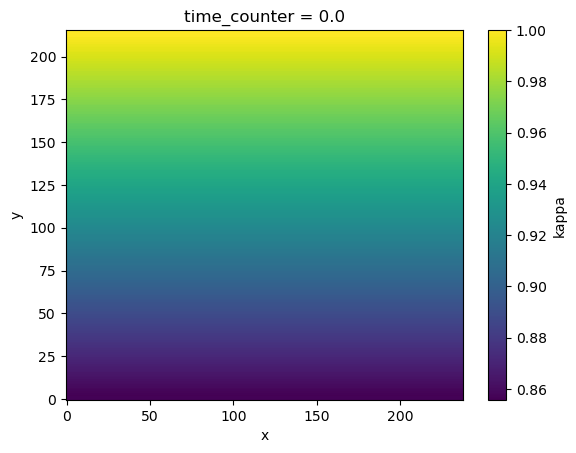

In [56]:
kappa16.kappa.plot()

In [57]:
kappa16.to_netcdf('/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/kappa16.nc')